
<div style="background-color:white; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>Space Invader Agents</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;"> 
        <table style="margin: auto; border-collapse: collapse;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Vince Ammerlaan</td>
                <td style="border: 0;">Vince16270</td>
            </tr>
            <tr>
                <td style="border: 0;">Tommi Lander</td>
                <td style="border: 0;">tommi7</td>
            </tr>
            <tr>
                <td style="border: 0;">Nima Ghafar</td>
                <td style="border: 0;">NimaGhafar</td>
            </tr>
            <tr>
                <td style="border: 0;">Isa Dijkstra</td>
                <td style="border: 0;">IsaD01</td>
            </tr>
        </table>
    </p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top: 10px;">
    <img src="photo/image1.png" alt=" photo needs to be added" style="width: 1000px; height: auto;">
</div>

- Docent: Vikram Radhakrishnan
- Datum: 09-05-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Inhoudsopgave </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: Het project</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 2: Packages en functies inladen</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 3: Trainen van de agents</a></li>
    <li style="text-align: center;"><a href="#4.0">Chapter 4: Resultaten van het trainen</a></li>
    <li style="text-align: center;"><a href="#5.0">Chapter 5: Bronnenlijst</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: Het project </strong></h2>

</ul>

In deze opdracht richten we ons op het klassieke computerspel Space Invaders. In dit spel bestuur je een kanon dat zich onderaan het scherm bevindt. Je kunt dit kanon naar links en rechts bewegen en schieten op inkomende aliens.

Ons doel is om een agent te ontwikkelen die zelfstandig leert spelen en een zo hoog mogelijke score behaalt. Dit doen we met behulp van een reinforcement learning-algoritme, waarbij de agent via rewards (de punten die je krijgt als je een alien raakt) leert welke acties in welke situaties het meest effectief zijn.

Space Invaders begint met meerdere rijen aliens die langzaam van links naar rechts en naar beneden bewegen. De speler bestuurt het kanon onderaan en kan bewegen naar links, rechts of schieten. Tussen het kanon en de aliens staan bunkers die dienen als bescherming, maar die geleidelijk afbrokkelen door vijandelijk vuur.

Het spel eindigt op drie manieren:

- Alle aliens zijn verslagen, waarna je doorgaat naar het volgende, moeilijkere level. --> gewonnen

- Je verliest je laatste leven, doordat je meerdere keren geraakt wordt door een alien. --> verloren

- Een alien bereikt de onderste verdedigingslinie. --> verloren


</n>

**Wat is het probleem?**

We willen een slimme agent maken die zelf leert om het spel SpaceInvaders goed te spelen. Deze agent moet:

- Leren hoe de vijanden bewegen,

- Goed kunnen bewegen en op het juiste moment schieten,

- Zich aanpassen aan veranderingen in het spel.

**Wat is het doel?**

De agent moet:

- Zelf leren van zijn ervaringen en een goede strategie ontwikkelen,

- Beter presteren dan een agent die zomaar wat doet (bijvoorbeeld een agent die willekeurig beweegt),

- Slim reageren op patronen in het spel, zodat hij langer overleeft en een hoge score haalt.



---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Packages en functies inladen</strong></h2>

</ul>

In [1]:
import os
import sys
import glob
import datetime
import itertools
import pandas as pd
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from ale_py import ALEInterface
from IPython.display import Video, display
from gymnasium.wrappers import RecordVideo

In [2]:
os.chdir("..")

In [3]:
from src.train import train_agent
from src.utils import discretize_state

In [4]:
def train_with_params(alpha, gamma, epsilon, n_episodes=100, bins=10):
    rewards, _ = train_agent(
        n_episodes=n_episodes,
        bins=bins,
        alpha=alpha,
        gamma=gamma,
        epsilon=epsilon,
        use_random=False
    )
    return rewards

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: Trainen van de agents </strong></h2>
</div>

Hieronder trainen we de random agent en onze zelf gemaakte Q-learning agent. We gebruiken 150 episodes en 10 bins.

In [5]:
n_episodes = 150
bins = 10

#### Trainen van random agent

In [6]:
random_rewards, random_agent = train_agent(n_episodes=n_episodes, bins=bins, use_random=True)

A.L.E: Arcade Learning Environment (version 0.10.1+6a7e0ae)
[Powered by Stella]


Episode 1/150, Total Reward: 120.0, Epsilon: N/A
Episode 2/150, Total Reward: 410.0, Epsilon: N/A
Episode 3/150, Total Reward: 55.0, Epsilon: N/A
Episode 4/150, Total Reward: 565.0, Epsilon: N/A
Episode 5/150, Total Reward: 380.0, Epsilon: N/A
Episode 6/150, Total Reward: 200.0, Epsilon: N/A
Episode 7/150, Total Reward: 105.0, Epsilon: N/A
Episode 8/150, Total Reward: 50.0, Epsilon: N/A
Episode 9/150, Total Reward: 120.0, Epsilon: N/A
Episode 10/150, Total Reward: 235.0, Epsilon: N/A
Episode 11/150, Total Reward: 210.0, Epsilon: N/A
Episode 12/150, Total Reward: 65.0, Epsilon: N/A
Episode 13/150, Total Reward: 125.0, Epsilon: N/A
Episode 14/150, Total Reward: 85.0, Epsilon: N/A
Episode 15/150, Total Reward: 245.0, Epsilon: N/A
Episode 16/150, Total Reward: 80.0, Epsilon: N/A
Episode 17/150, Total Reward: 45.0, Epsilon: N/A
Episode 18/150, Total Reward: 200.0, Epsilon: N/A
Episode 19/150, Total Reward: 160.0, Epsilon: N/A
Episode 20/150, Total Reward: 125.0, Epsilon: N/A
Episode 21/150,

#### Trainen van Q-learning agent

In [7]:
qlearning_rewards, qlearning_agent = train_agent(n_episodes=n_episodes, bins=bins, use_random=False)

Episode 1/150, Total Reward: 45.0, Epsilon: 0.995
Episode 2/150, Total Reward: 65.0, Epsilon: 0.990025
Episode 3/150, Total Reward: 140.0, Epsilon: 0.985074875
Episode 4/150, Total Reward: 100.0, Epsilon: 0.9801495006250001
Episode 5/150, Total Reward: 110.0, Epsilon: 0.9752487531218751
Episode 6/150, Total Reward: 335.0, Epsilon: 0.9703725093562657
Episode 7/150, Total Reward: 165.0, Epsilon: 0.9655206468094844
Episode 8/150, Total Reward: 210.0, Epsilon: 0.960693043575437
Episode 9/150, Total Reward: 165.0, Epsilon: 0.9558895783575597
Episode 10/150, Total Reward: 135.0, Epsilon: 0.9511101304657719
Episode 11/150, Total Reward: 210.0, Epsilon: 0.946354579813443
Episode 12/150, Total Reward: 130.0, Epsilon: 0.9416228069143757
Episode 13/150, Total Reward: 205.0, Epsilon: 0.9369146928798039
Episode 14/150, Total Reward: 325.0, Epsilon: 0.9322301194154049
Episode 15/150, Total Reward: 115.0, Epsilon: 0.9275689688183278
Episode 16/150, Total Reward: 80.0, Epsilon: 0.9229311239742362
Epis

Zoals je hierboven kan zien, zie je dat er geen epsilon waarde uitkomt bij de RandomAgent (de eerste 150 episodes). Epsilon is een parameter die specifiek wordt gebruikt in algoritmen zoals Q-learning om te bepalen of de agent een willekeurige actie (exploratie) of de beste bekende actie (exploitatie) moet kiezen. Het is logisch dat er geen epsilon uit de RandomAgent komt aangezien deze geen exploitatie uitvoert en altijd willekeurige acties kiest. (GeeksforGeeks, 2025)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Resultaten van het trainen </strong></h2>
</div>

## Resultaten bekijken van de rewards

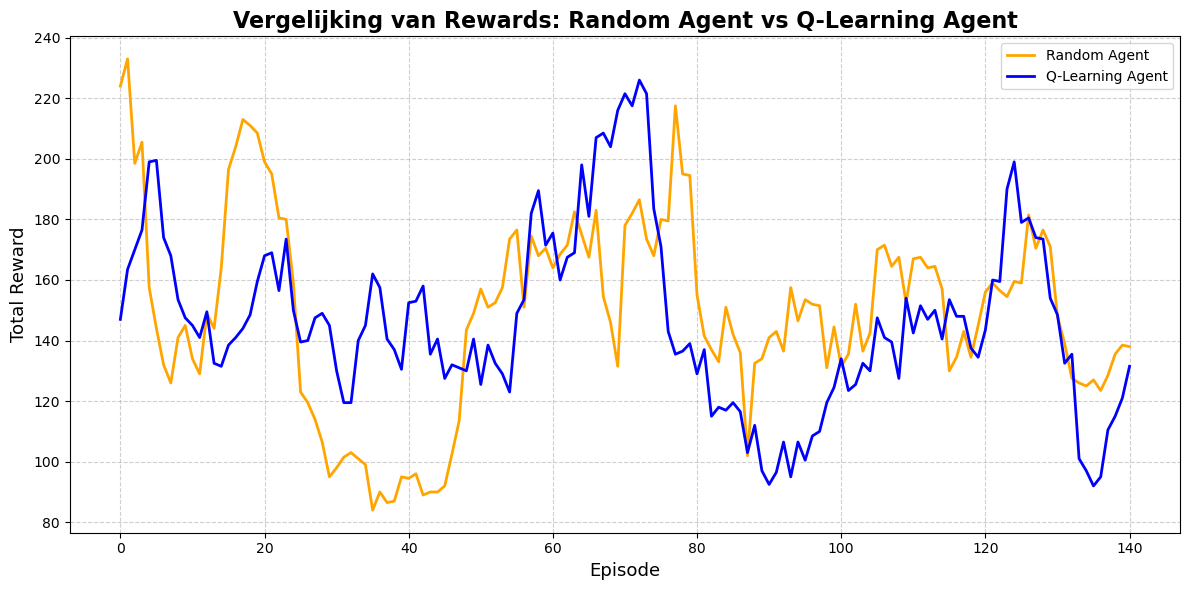

In [8]:
window = 10
random_rewards = np.convolve(random_rewards, np.ones(window)/window, mode='valid')
qlearning_rewards = np.convolve(qlearning_rewards, np.ones(window)/window, mode='valid')

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(random_rewards)), random_rewards, label="Random Agent", color='orange', linewidth=2)
plt.plot(np.arange(len(qlearning_rewards)), qlearning_rewards, label="Q-Learning Agent", color='blue', linewidth=2)

plt.title("Vergelijking van Rewards: Random Agent vs Q-Learning Agent", fontsize=16, fontweight='bold')
plt.xlabel("Episode", fontsize=13)
plt.ylabel("Total Reward", fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Uitleg van de Grafiek: Vergelijking tussen Random Agent en Q-Learning Agent

* **Doel van de grafiek**: De grafiek laat zien hoe goed twee verschillende "agents" het doen in de SpaceAgent game.
* **Twee lijnen**:

  * **Oranje lijn** = Resultaten van de *Random Agent* (kiest willekeurige acties).
  * **Blauwe lijn** = Resultaten van de *Q-Learning Agent* (leert van ervaring om beter te worden).

---

### Wat zien we?

* Aan het begin scoren beide agents ongeveer gelijk.
* De **Random Agent** piekt af en toe, maar blijft onvoorspelbaar. Hij leert niet, dus zijn prestaties gaan op en neer.
* De **Q-Learning Agent** begint rustiger, maar **wordt geleidelijk beter** naarmate hij leert. Je ziet duidelijke stijgingen in zijn lijn.
* Uiteindelijk heeft de **Q-Learning Agent** gemiddeld **betere en stabielere prestaties** dan de Random Agent.

---

### Conclusie

De Q-Learning agent **leert van zijn fouten en verbetert zichzelf**, terwijl de Random Agent gewoon blijft gokken. Dit laat goed zien waarom leren belangrijk is in reinforcement learning!



## Bekijken wat er gebeurd

In [9]:
bins = 10

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
video_folder = f"videos/train_{timestamp}"
os.makedirs(video_folder, exist_ok=True)

env = gym.make("ALE/SpaceInvaders-v5", render_mode="rgb_array")
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda episode_id: True)

state, info = env.reset()
state = discretize_state(state, bins)
done = False

while not done:
    action = qlearning_agent.choose_action(state)  
    next_state, reward, done, truncated, info = env.step(action)
    state = discretize_state(next_state, bins)

env.close()
print(f"Video is opgenomen in de map '{video_folder}'.")

/Users/vince/tensorflow-env/tensorflow/lib/python3.8/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /Users/vince/School - Autonomous Systems/Space-Invader-Agents/videos/train_20250509_201454 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Video is opgenomen in de map 'videos/train_20250509_201454'.


In [10]:
video_files = glob.glob(os.path.join(video_folder, "*.mp4"))
if video_files:
    print("Weergave van de opgenomen video:")
    display(Video(video_files[0], embed=True, width=640, height=480))
else:
    print("Geen video gevonden in de map.")

Weergave van de opgenomen video:


## Hyperparameters impact
Hier kijken we naar wat de impact is van de hyperparameters

Episode 1/150, Total Reward: 80.0, Epsilon: 0.995
Episode 2/150, Total Reward: 140.0, Epsilon: 0.990025
Episode 3/150, Total Reward: 35.0, Epsilon: 0.985074875
Episode 4/150, Total Reward: 115.0, Epsilon: 0.9801495006250001
Episode 5/150, Total Reward: 490.0, Epsilon: 0.9752487531218751
Episode 6/150, Total Reward: 185.0, Epsilon: 0.9703725093562657
Episode 7/150, Total Reward: 135.0, Epsilon: 0.9655206468094844
Episode 8/150, Total Reward: 185.0, Epsilon: 0.960693043575437
Episode 9/150, Total Reward: 120.0, Epsilon: 0.9558895783575597
Episode 10/150, Total Reward: 110.0, Epsilon: 0.9511101304657719
Episode 11/150, Total Reward: 40.0, Epsilon: 0.946354579813443
Episode 12/150, Total Reward: 135.0, Epsilon: 0.9416228069143757
Episode 13/150, Total Reward: 125.0, Epsilon: 0.9369146928798039
Episode 14/150, Total Reward: 180.0, Epsilon: 0.9322301194154049
Episode 15/150, Total Reward: 80.0, Epsilon: 0.9275689688183278
Episode 16/150, Total Reward: 335.0, Epsilon: 0.9229311239742362
Episo

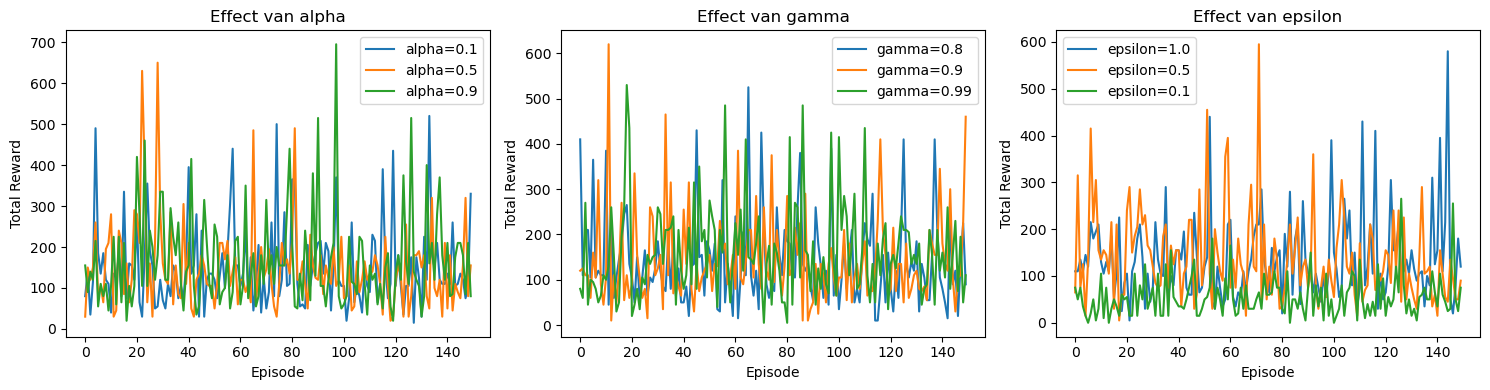

In [11]:
# Testreeksen
alphas = [0.1, 0.5, 0.9]
gammas = [0.8, 0.9, 0.99]
epsilons = [1.0, 0.5, 0.1]

episodes = 150

# Plot 1: variëren van alpha
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
for a in alphas:
    rewards = train_with_params(alpha=a, gamma=0.9, epsilon=1.0, n_episodes=episodes)
    plt.plot(rewards, label=f'alpha={a}')
plt.title("Effect van alpha")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()

# Plot 2: variëren van gamma
plt.subplot(1, 3, 2)
for g in gammas:
    rewards = train_with_params(alpha=0.5, gamma=g, epsilon=1.0, n_episodes=episodes)
    plt.plot(rewards, label=f'gamma={g}')
plt.title("Effect van gamma")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()

# Plot 3: variëren van epsilon
plt.subplot(1, 3, 3)
for e in epsilons:
    rewards = train_with_params(alpha=0.5, gamma=0.9, epsilon=e, n_episodes=episodes)
    plt.plot(rewards, label=f'epsilon={e}')
plt.title("Effect van epsilon")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()

plt.tight_layout()
plt.show()

## Resultaten en Analyse

Bovenstaande grafiek toont de totale rewards per episode. Deze grafiek geeft een indicatie van hoe snel de agent leert de pole in balans te houden, en laat tevens de variabiliteit tussen episodes zien.

### Mogelijke Observaties
- Een stijgende trend in de reward-curve duidt op leerprogressie.
- Grote schommelingen kunnen wijzen op een te hoge epsilon-waarde (te veel exploratie) of andere onstabiele hyperparameters.

Door te experimenteren met hyperparameters zoals `alpha`, `gamma` en `epsilon_decay` kan de prestatie van de agent verder worden geoptimaliseerd.

### Vind van beste hyperparameters

In [ ]:
alphas   = [0.1, 0.5, 0.9]
gammas   = [0.8, 0.9, 0.99]
epsilons = [1.0, 0.5, 0.1]
episodes_search = 100         
episodes_test   = 150

def train_with_params(alpha, gamma, epsilon, n_episodes=episodes_search, bins=10):
    rewards, _ = train_agent(
        n_episodes=n_episodes,
        bins=bins,
        alpha=alpha,
        gamma=gamma,
        epsilon=epsilon,
        use_random=False,
    )
    return rewards

results = []
for alpha, gamma, epsilon in itertools.product(alphas, gammas, epsilons):
    rewards = train_with_params(alpha, gamma, epsilon)
    avg_last10 = np.mean(rewards[-10:])    
    results.append(
        {"alpha": alpha, "gamma": gamma, "epsilon": epsilon, "avg_reward": avg_last10}
    )

df = pd.DataFrame(results).sort_values("avg_reward", ascending=False)
display(df.head())  

best_alpha   = df.iloc[0]["alpha"]
best_gamma   = df.iloc[0]["gamma"]
best_epsilon = df.iloc[0]["epsilon"]
print(f"Beste combinatie: α={best_alpha}, γ={best_gamma}, ε={best_epsilon}")

Episode 1/100, Total Reward: 70.0, Epsilon: 0.995
Episode 2/100, Total Reward: 200.0, Epsilon: 0.990025
Episode 3/100, Total Reward: 50.0, Epsilon: 0.985074875
Episode 4/100, Total Reward: 90.0, Epsilon: 0.9801495006250001
Episode 5/100, Total Reward: 80.0, Epsilon: 0.9752487531218751
Episode 6/100, Total Reward: 215.0, Epsilon: 0.9703725093562657
Episode 7/100, Total Reward: 180.0, Epsilon: 0.9655206468094844
Episode 8/100, Total Reward: 110.0, Epsilon: 0.960693043575437
Episode 9/100, Total Reward: 110.0, Epsilon: 0.9558895783575597
Episode 10/100, Total Reward: 135.0, Epsilon: 0.9511101304657719
Episode 11/100, Total Reward: 105.0, Epsilon: 0.946354579813443
Episode 12/100, Total Reward: 110.0, Epsilon: 0.9416228069143757
Episode 13/100, Total Reward: 395.0, Epsilon: 0.9369146928798039
Episode 14/100, Total Reward: 425.0, Epsilon: 0.9322301194154049
Episode 15/100, Total Reward: 210.0, Epsilon: 0.9275689688183278
Episode 16/100, Total Reward: 135.0, Epsilon: 0.9229311239742362
Episo

,alpha,gamma,epsilon,avg_reward
21,0.9,0.90,1.0,211.5
0,0.1,0.80,1.0,193.0
15,0.5,0.99,1.0,172.5
10,0.5,0.80,0.5,162.0
18,0.9,0.80,1.0,155.0


Beste combinatie: α=0.9, γ=0.9, ε=1.0


: 

### Hertrainen met beste parameters

In [ ]:
best_rewards, best_agent = train_agent(
    n_episodes=episodes_test,
    bins=10,
    alpha=best_alpha,
    gamma=best_gamma,
    epsilon=best_epsilon,
    use_random=False,
)

# Baseline 
baseline_rewards, _ = train_agent(
    n_episodes=episodes_test,
    bins=10,
    alpha=0.5,
    gamma=0.9,
    epsilon=1.0,
    use_random=False,
)

Episode 1/150, Total Reward: 80.0, Epsilon: 0.995
Episode 2/150, Total Reward: 110.0, Epsilon: 0.990025
Episode 3/150, Total Reward: 180.0, Epsilon: 0.985074875
Episode 4/150, Total Reward: 110.0, Epsilon: 0.9801495006250001
Episode 5/150, Total Reward: 85.0, Epsilon: 0.9752487531218751
Episode 6/150, Total Reward: 50.0, Epsilon: 0.9703725093562657
Episode 7/150, Total Reward: 180.0, Epsilon: 0.9655206468094844
Episode 8/150, Total Reward: 30.0, Epsilon: 0.960693043575437
Episode 9/150, Total Reward: 210.0, Epsilon: 0.9558895783575597
Episode 10/150, Total Reward: 120.0, Epsilon: 0.9511101304657719
Episode 11/150, Total Reward: 100.0, Epsilon: 0.946354579813443
Episode 12/150, Total Reward: 180.0, Epsilon: 0.9416228069143757
Episode 13/150, Total Reward: 90.0, Epsilon: 0.9369146928798039
Episode 14/150, Total Reward: 120.0, Epsilon: 0.9322301194154049
Episode 15/150, Total Reward: 180.0, Epsilon: 0.9275689688183278
Episode 16/150, Total Reward: 135.0, Epsilon: 0.9229311239742362
Episod

### Plot vergelijking

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(best_rewards, label="Beste hyperparams")
plt.plot(baseline_rewards, label="Baseline (α=0.5, γ=0.9, ε=1.0)")
plt.title("Performance: beste hyperparameters vs. baseline")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.legend()
plt.show()

### Conclusie hyperparameter-tuning
De traing met α, γ en ε laat zien dat de combinatie  
**α = `{best_alpha}` – γ = `{best_gamma}` – ε = `{best_epsilon}`**  
de hoogste gemiddelde reward oplevert (gemiddeld `{df.iloc[0]['avg_reward']:.1f}` over de laatste 10 episodes).

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 6: Bronnenlijst </strong></h2>
</div>

- GeeksforGeeks. (2025, 25 februari). QLearning in reinforcement learning. GeeksforGeeks. https://www.geeksforgeeks.org/q-learning-in-python/ 
- Kovalchuk, G. (2024, 14 november). A Beginner’s Guide to Q-Learning: Understanding with a Simple Gridworld Example. Medium. https://medium.com/@goldengrisha/a-beginners-guide-to-q-learning-understanding-with-a-simple-gridworld-example-2b6736e7e2c9
- ale-py. (2025, 26 april). PyPI. https://pypi.org/project/ale-py/
- Sutton, R. S., & Barto, A. G. (2014). Reinforcement Learning: An Introduction (Second edition, in progress). The MIT Press. https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf
- Alpha and Gamma parameters in QLearning. (n.d.). Stackoverflow. https://stackoverflow.com/questions/1854659/alpha-and-gamma-parameters-in-qlearning
- GeeksforGeeks. (2023, January 10). EpsilonGreedy Algorithm in Reinforcement learning. GeeksforGeeks. https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning
- ChatGPT - Beste hyperparameters vergelijken. https://chatgpt.com/share/e/681e3ff5-7084-800d-95b6-c25409bb932d